#Task 4: Credit Risk Prediction
**Dataset**

Loan Prediction Dataset

##1. Introduction and Problem Statement

Credit risk prediction is a crucial task in the financial industry. Banks and financial institutions must assess whether a loan applicant is likely to repay a loan or default. Poor credit decisions can lead to significant financial losses.

- **Problem Statement:**
Given historical loan application data, the objective of this task is to build a machine learning model that predicts whether a loan applicant will pay back the loan (1) or default (0).

- **Model Used:** Decision Tree Classifier
- **Why Decision Tree?** It is easy to interpret, handles both numerical and categorical data well, and provides clear decision rules.
- **Objective**: To Predict whether a loan applicant will pay back or default, using historical loan application data.
We will use a Decision Tree classifier for this task.

#2. Dataset Understanding and Description

- **Dataset Name:** Loan Prediction Dataset
- **Source:** Kaggle
- **Rows:** 20,000 (approx.)
- **Target Variable:** loan_paid_back

**Key Features:**

- **Demographic Information:** gender, marital_status, education_level

- **Financial Information:** annual_income, monthly_income, credit_score

- **Loan Details:** loan_amount, interest_rate, loan_term, installment

- **Credit History:** delinquency_history, public_records

The dataset contains both numerical and categorical variables, along with some missing values that must be handled before model training.

### Step 1: Import Required Libraries
We import libraries for data handling, visualization, and machine learning.


In [2]:
# data handling Library
import pandas as pd
import numpy as np

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Model training library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


### Step 2: Load the Dataset
Load the CSV file into a pandas DataFrame.


In [3]:
from google.colab import files
files.upload() # Upload the loan.csv

df = pd.read_csv("loan_dataset_20000.csv")
df.head()

Saving loan_dataset_20000.csv to loan_dataset_20000.csv


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


##3. Data Cleaning & Preparation
###Step 3: Understand the Dataset
We examine the dataset to understand:

- Number of rows and columns
- Data types
- Presence of missing values

In [4]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

In [5]:
df.describe()

,age,annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term,installment,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,48.027000,43549.637765,3629.136466,0.177019,679.25695,15129.300909,12.400627,43.22280,455.625794,5.011800,48649.824769,24333.394631,1.990150,0.061800,2.489150,0.799900
std,15.829352,28668.579671,2389.048326,0.105059,69.63858,8605.405513,2.442729,11.00838,274.622125,2.244529,32423.378128,22313.845395,1.474945,0.285105,1.631384,0.400085
min,21.000000,6000.000000,500.000000,0.010000,373.00000,500.000000,3.140000,36.00000,9.430000,0.000000,6157.800000,496.350000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,24260.752500,2021.730000,0.096000,632.00000,8852.695000,10.740000,36.00000,253.910000,3.000000,27180.492500,9592.572500,1.000000,0.000000,1.000000,1.000000
50%,48.000000,36585.260000,3048.770000,0.160000,680.00000,14946.170000,12.400000,36.00000,435.595000,5.000000,40241.615000,18334.555000,2.000000,0.000000,2.000000,1.000000
75%,62.000000,54677.917500,4556.495000,0.241000,727.00000,20998.867500,14.002500,60.00000,633.595000,6.000000,60361.257500,31743.327500,3.000000,0.000000,3.000000,1.000000
max,75.000000,400000.000000,33333.330000,0.667000,850.00000,49039.690000,22.510000,60.00000,1685.400000,15.000000,454394.190000,352177.900000,11.000000,2.000000,11.000000,1.000000


In [6]:
df.columns

Index(['age', 'gender', 'marital_status', 'education_level', 'annual_income',
       'monthly_income', 'employment_status', 'debt_to_income_ratio',
       'credit_score', 'loan_amount', 'loan_purpose', 'interest_rate',
       'loan_term', 'installment', 'grade_subgrade', 'num_of_open_accounts',
       'total_credit_limit', 'current_balance', 'delinquency_history',
       'public_records', 'num_of_delinquencies', 'loan_paid_back'],
      dtype='object')

##4. Data Cleaning and Preparation
###Step 4: Check for Missing Values
Missing values can negatively affect model performance.
We identify missing values in each column.

In [7]:
df.isnull().sum()

,0
age,0
gender,0
marital_status,0
education_level,0
annual_income,0
monthly_income,0
employment_status,0
debt_to_income_ratio,0
credit_score,0
loan_amount,0


###Step 5: Handle Missing Values
Missing values are handled as follows:

Numerical columns → filled using mean
Categorical columns → filled using mode

In [8]:
numerical_cols = [
    'annual_income', 'monthly_income', 'debt_to_income_ratio',
    'credit_score', 'loan_amount', 'interest_rate', 'loan_term',
    'installment', 'num_of_open_accounts', 'total_credit_limit',
    'current_balance', 'num_of_delinquencies'
]

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())



###Step 6: Encode Categorical Variables
Machine learning models require numerical input.
Categorical variables are converted into numerical format using one-hot encoding.

In [9]:
categorical_cols = [
    'gender', 'marital_status', 'education_level',
    'employment_status', 'loan_purpose', 'grade_subgrade',
    'delinquency_history', 'public_records'
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

##5. Exploratory Data Analysis (EDA)


### Step 7: Exploratory Data Analysis (EDA)

EDA helps in understanding relationships between features and the target variable.  
We visualize loan amount, income, and education.


**Loan Amount Distribution**

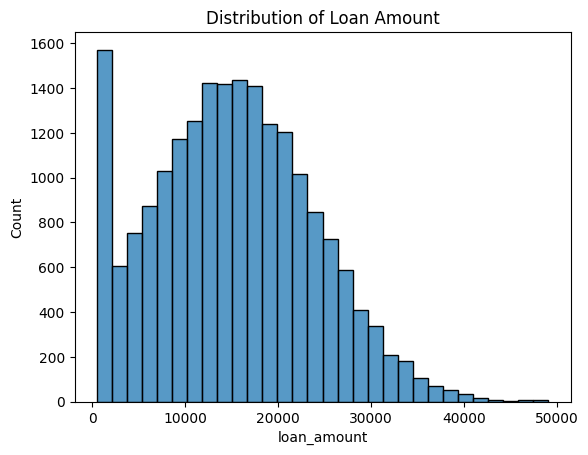

In [10]:
sns.histplot(df['loan_amount'], bins=30)
plt.title("Distribution of Loan Amount")
plt.show()

**Annual Income vs Loan Paid Back**

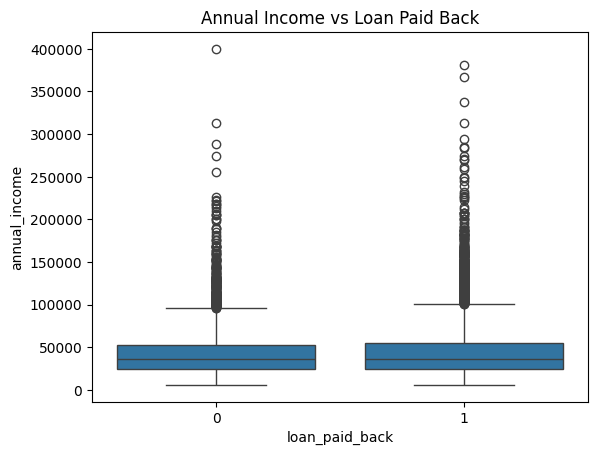

In [11]:
sns.boxplot(x='loan_paid_back', y='annual_income', data=df)
plt.title("Annual Income vs Loan Paid Back")
plt.show()

**Education Level vs Loan Paid Back**

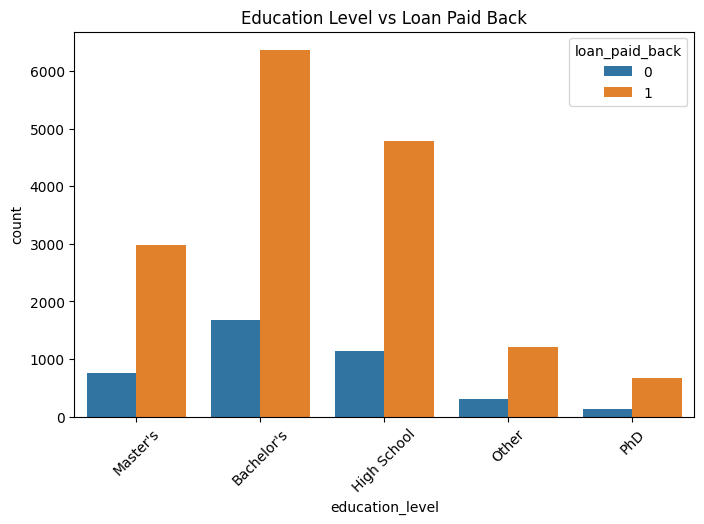

In [12]:
import pandas as pd

# Load the original dataset into a temporary DataFrame for plotting
# This ensures we have the 'education_level' column in its original categorical form
temp_df = pd.read_csv("loan_dataset_20000.csv")

plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', hue='loan_paid_back', data=temp_df)
plt.title('Education Level vs Loan Paid Back')
plt.xticks(rotation=45)
plt.show()

##5. Model Training and Testing
### Step 8: Define Features and Target
- Features (X): All columns except `loan_paid_back`
- Target (y): `loan_paid_back` (0 = default, 1 = paid back)



In [13]:
X = df.drop('loan_paid_back', axis=1)
y = df['loan_paid_back']

### Step 9: Split the Dataset

The dataset is split into:
- Training data (80%)
- Testing data (20%)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Step 10: Train Decision Tree Model


A Decision Tree Classifier with a maximum depth of 5 was trained. Limiting the depth helps reduce overfitting and improves generalization.


In [15]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth controls overfitting
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Step 11: Make Predictions

The trained model is used to predict loan default status on test data.


In [16]:
y_pred = dt_model.predict(X_test)


##6. Model Evaluation
### Step 12: Evaluate the Model

The model is evaluated using:
- **Accuracy score:** Accuracy measures the proportion of correctly classified instances.


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.89725


The model achieved a good accuracy, indicating effective prediction capability.

###Confusion Matrix

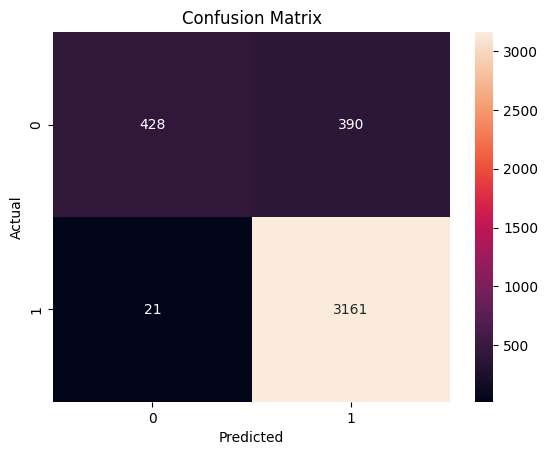

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix provides a detailed breakdown of predictions:

- **True Positives:** Correctly predicted loan repayments

- **True Negatives:** Correctly predicted defaults

- **False Positives:** Predicted paid back but actually defaulted

- **False Negatives:** Predicted default but actually paid back

The confusion matrix heatmap shows balanced performance across both classes.

**Classification Report**

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.52      0.68       818
           1       0.89      0.99      0.94      3182

    accuracy                           0.90      4000
   macro avg       0.92      0.76      0.81      4000
weighted avg       0.90      0.90      0.89      4000



This provides:

- Precision

- Recall

- F1-score

#7. Conclusion and Key Insights
##**Key Insights:**

- Credit score and income are strong indicators of loan repayment ability

- Higher education and stable employment improve repayment likelihood

- Decision Trees provide interpretable and effective credit risk models

##**Conclusion:**

In this task, we successfully built a credit risk prediction system by:

- Cleaning and preprocessing the dataset

- Performing detailed exploratory data analysis

- Training a Decision Tree classification model

- Evaluating performance using accuracy and a confusion matrix

The results demonstrate that machine learning techniques can effectively support credit risk assessment and decision-making in financial institutions.
